# Milestone 1
## Exploratory Data Analysis


In [1]:
import random
import squarify
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

font = {'family' : 'DejaVu Sans',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('image', cmap='Paired')  

In [2]:
# Load the data
DATA_PATH = '../data'
movies = pd.read_csv(f'{DATA_PATH}/movies.csv').drop(columns = 'Unnamed: 0')
persons = pd.read_csv(f'{DATA_PATH}/persons.csv').drop(columns = 'Unnamed: 0')
genres = pd.read_csv(f'{DATA_PATH}/genres.csv').drop(columns = 'Unnamed: 0')
countries = pd.read_csv(f'{DATA_PATH}/countries.csv').drop(columns = 'Unnamed: 0')

In [3]:
# Split attributes with multiple values per row
movies['genres'] = movies.genres.str.split(',')
movies['countries'] = movies.countries.str.split(',')
movies['actors'] = movies.actors.str.split(',')
movies['directors'] = movies.directors.str.split(',')
movies['alternate genres'] = movies['alternate genres'].str.split(',')
movies['release date on Netflix'] = pd.to_datetime(movies['release date on Netflix'])
movies.rename(columns = {'year': 'actual_release_year'}, inplace = True)

movies['month'] = movies['release date on Netflix'].dt.month
movies['year'] = movies['release date on Netflix'].dt.year 

In [4]:
# Dictionnary for faster countries and genres access 
countries_to_name = countries.set_index('id').to_dict(orient='index')
genres_to_name = genres.set_index('id').to_dict(orient='index')
persons_to_name = persons.set_index('id').to_dict(orient='index')

def get_genre_name(id_):
    return genres_to_name[int(id_)]['name']

def get_country_name(id_):
    return countries_to_name[int(id_)]['name']

def get_person_name(id_):
    return persons_to_name[int(id_)]['name']

In [5]:
movies.head()

,id,title,description,imdb,metacritic,duration,number of seasons,audio,family friendly,age rating,release date on Netflix,actual_release_year,actors,directors,countries,genres,alternate genres,month,year
0,0,Riding Faith (Hope Ranch),"Following her father's death, a young woman st...",4.2,NaN,81.0,NaN,English,False,10+,2020-06-17,2020,"[0, 1, 2, 3, 4]",[5],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1]","[2, 3, 4, 5]",6,2020
1,1,Los Rodriguez y el mas alla,When a young boy finds a message from his late...,4.6,NaN,116.0,NaN,European Spanish,False,10+,2020-03-22,2019,"[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]",[18],"[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 2...","[6, 1, 7]","[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",3,2020
2,2,Mauricio Meirelles: Generating Chaos,Comedian Mauricio Meirelles explores his chaot...,5.2,NaN,63.0,NaN,Brazilian Portuguese,False,18+,2020-04-16,2020,[19],[20],"[32, 0, 15, 33, 1, 34, 35, 16, 36, 37, 38, 17,...","[6, 19]","[11, 20, 21, 22]",4,2020
3,3,The Asterisk War,A 'Genestella' a new breed of powerful human n...,6.8,NaN,NaN,1.0,Japanese,False,13+,2018-07-01,2015,"[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]",NaN,"[32, 0, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42...","[23, 24]","[24, 25, 26, 27, 28]",7,2018
4,4,Banana Split,"Despite leaving for college, a heartsick teen ...",6.2,63.0,83.0,NaN,English,False,16+,2020-07-26,2018,"[33, 34, 35, 36, 37, 38, 39, 40]",[41],"[2, 13]",[6],"[11, 3, 29, 30]",7,2020


Notice that, in our dataset, a movie have a `duration` in minutes but doesn't have a `number of seasons`. For a TV show it is the opposite, it doesn't have a `duration` but it has a precise `number of seasons`.

### Basic Statistics

In [6]:
print('Here are some basic statistics about our data:', end = '\n\n')

print(f'--> There are {len(movies)} items of the Netflix catalogue in our data.', end='\n\n')

first_date = movies['release date on Netflix'].min()
last_date = movies['release date on Netflix'].max()
print(f'--> The content we have was released on Netflix between {first_date} and {last_date}.', end='\n\n')

n_actors = movies.actors.explode().nunique()
print(f'--> There are {n_actors} unique actors starring in the Netflix catalogue.', end='\n\n')

n_directors = movies.directors.explode().nunique()
print(f'--> There are {n_directors} unique directors in the Netflix catalogue.', end='\n\n')

n_genres = movies.genres.explode().nunique()
n_genres_alt = movies['alternate genres'].explode().nunique()
print(f'--> Content is classified into {n_genres} genres (and {n_genres_alt} alternative genres) in the Netflix catalogue.', end='\n\n')

Here are some basic statistics about our data:

--> There are 9113 items of the Netflix catalogue in our data.

--> The content we have was released on Netflix between 2015-04-14 00:00:00 and 2021-04-08 00:00:00.

--> There are 40868 unique actors starring in the Netflix catalogue.

--> There are 5451 unique directors in the Netflix catalogue.

--> Content is classified into 25 genres (and 899 alternative genres) in the Netflix catalogue.



### Movies vs. TV shows 

A first interesting statistic to note is the proportion of movies and TV shows available on the streaming platform. Netflix is best-known for TV-shows, but it actually started out as a movie-rental service. There are clearly more movies than TV shows in their current catalogue.

There are 7538 movies and 1575 TV shows in the dataset.


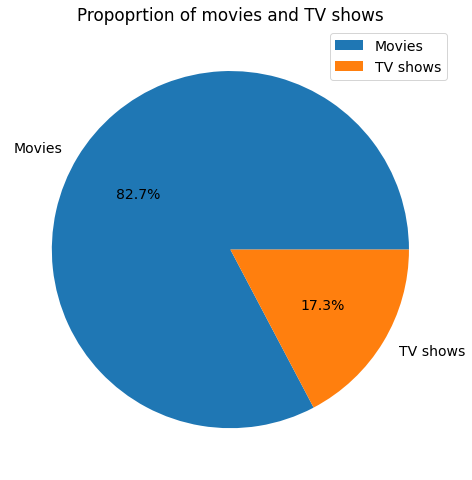

In [7]:
nb_movies = movies.duration.dropna().count()
nb_shows = movies['number of seasons'].dropna().count()
print('There are {0} movies and {1} TV shows in the dataset.'.format(nb_movies, nb_shows))

plt.figure(figsize = (8, 10))
plt.pie([nb_movies, nb_shows], autopct='%1.1f%%', labels = ['Movies', 'TV shows'])
plt.legend()
plt.title('Propoprtion of movies and TV shows')
plt.show()

### Proportion of content for each age rating

The streaming platform is popular among families, it therefore offers a large variety of content destined to different-aged publics. 

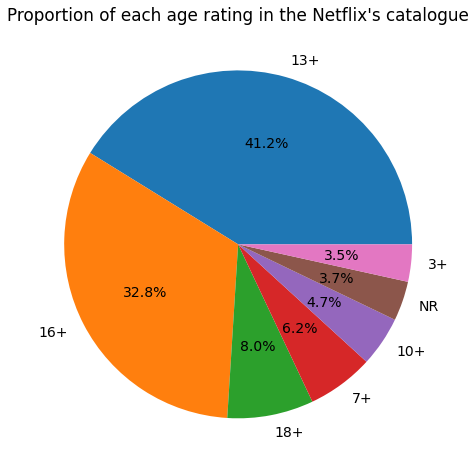

In [8]:
plt.figure(figsize = (8,8))
prop_age = movies['age rating'].value_counts()
prop_age = prop_age[prop_age>10]
plt.pie(prop_age, autopct='%1.1f%%', labels = prop_age.index)
plt.title('Proportion of each age rating in the Netflix\'s catalogue')
plt.show()

Netflix offers mostly content aimed towards a public of `+13` and `+16`.

### Number of items per country

In 2010, Netflix decided to expand its operations to a wider range of locations. Today, it is available in more than 190 countries. Naturally, some content is specific to a certain region, depending on language, culture and copyrights. Let's explore the catalogue's size depending on the country.

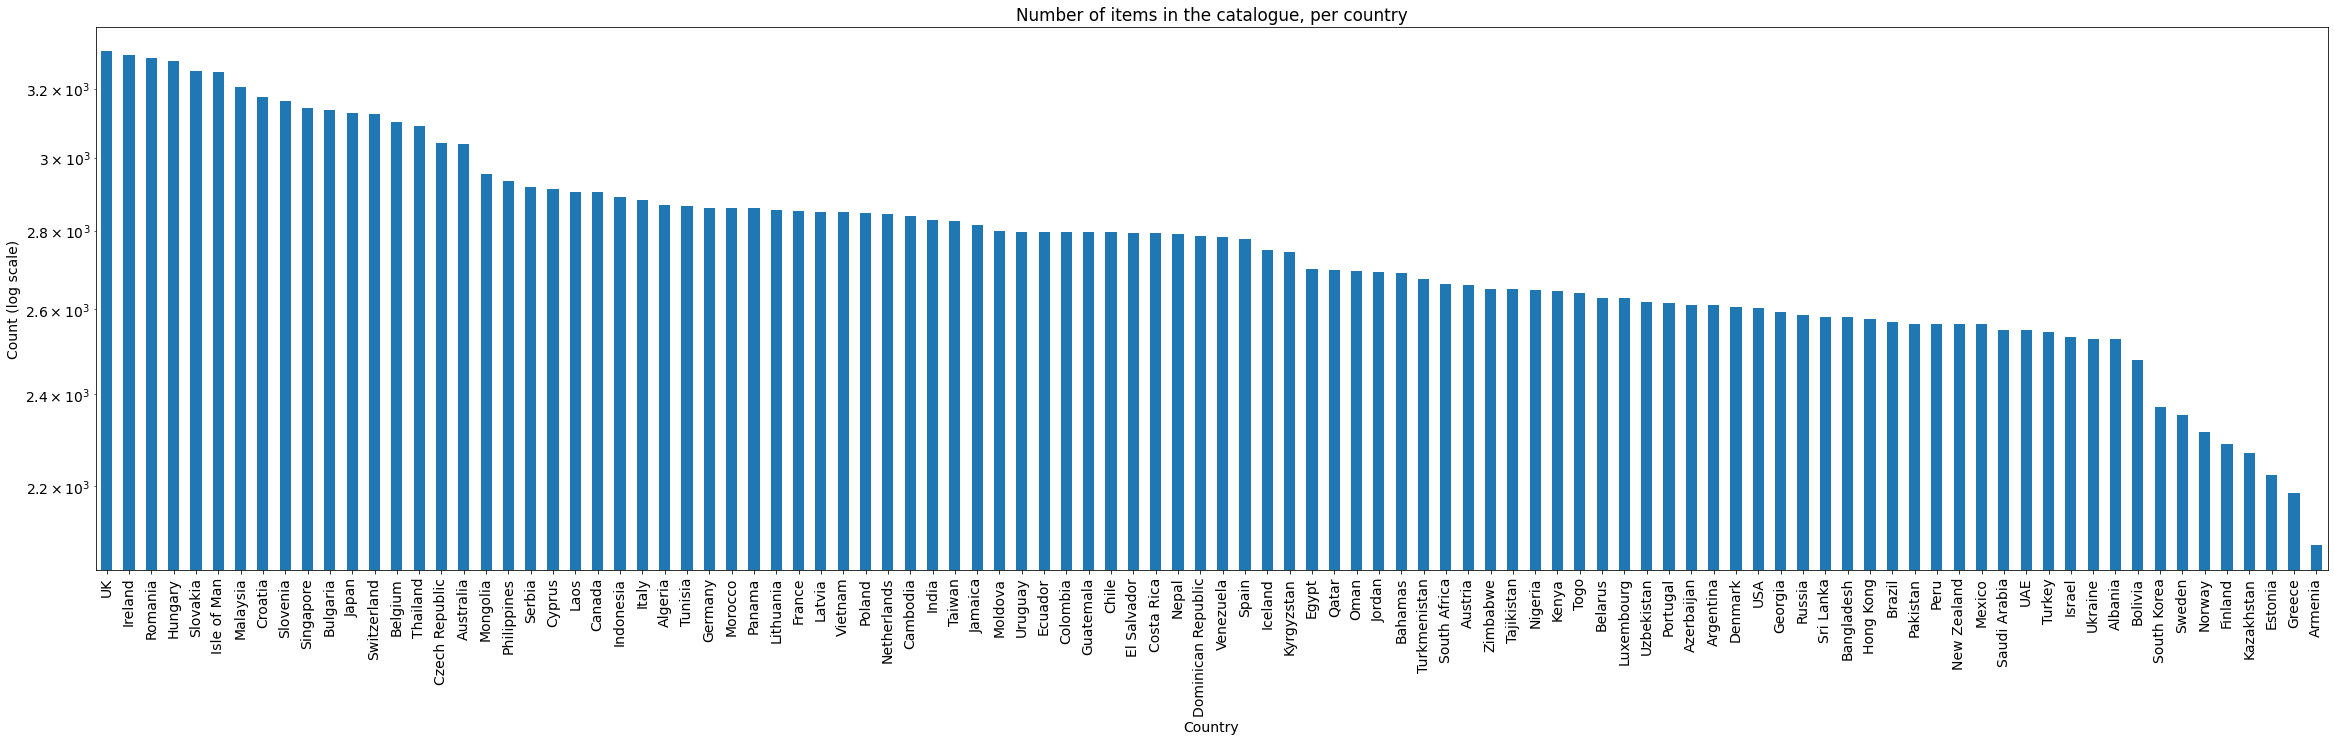

In [9]:
countries_count = movies.countries.explode().value_counts()
countries_count.index = countries_count.index.map(get_country_name)
countries_count.plot.bar(figsize = (40,10))
plt.title('Number of items in the catalogue, per country')
plt.xlabel('Country')
plt.ylabel('Count (log scale)')
plt.yscale('log')
plt.show()

### Audio representation in the catalogue

With its expansion, Netflix acquired content rights to match the culture of its newly added regions. Moreover, it recently started to produce its own content, in various languages. Let's explore the representation of each language in Netflix's library.

There are 73 different languages in our dataset. The 3 most present ones are English, Japanese and Korean.


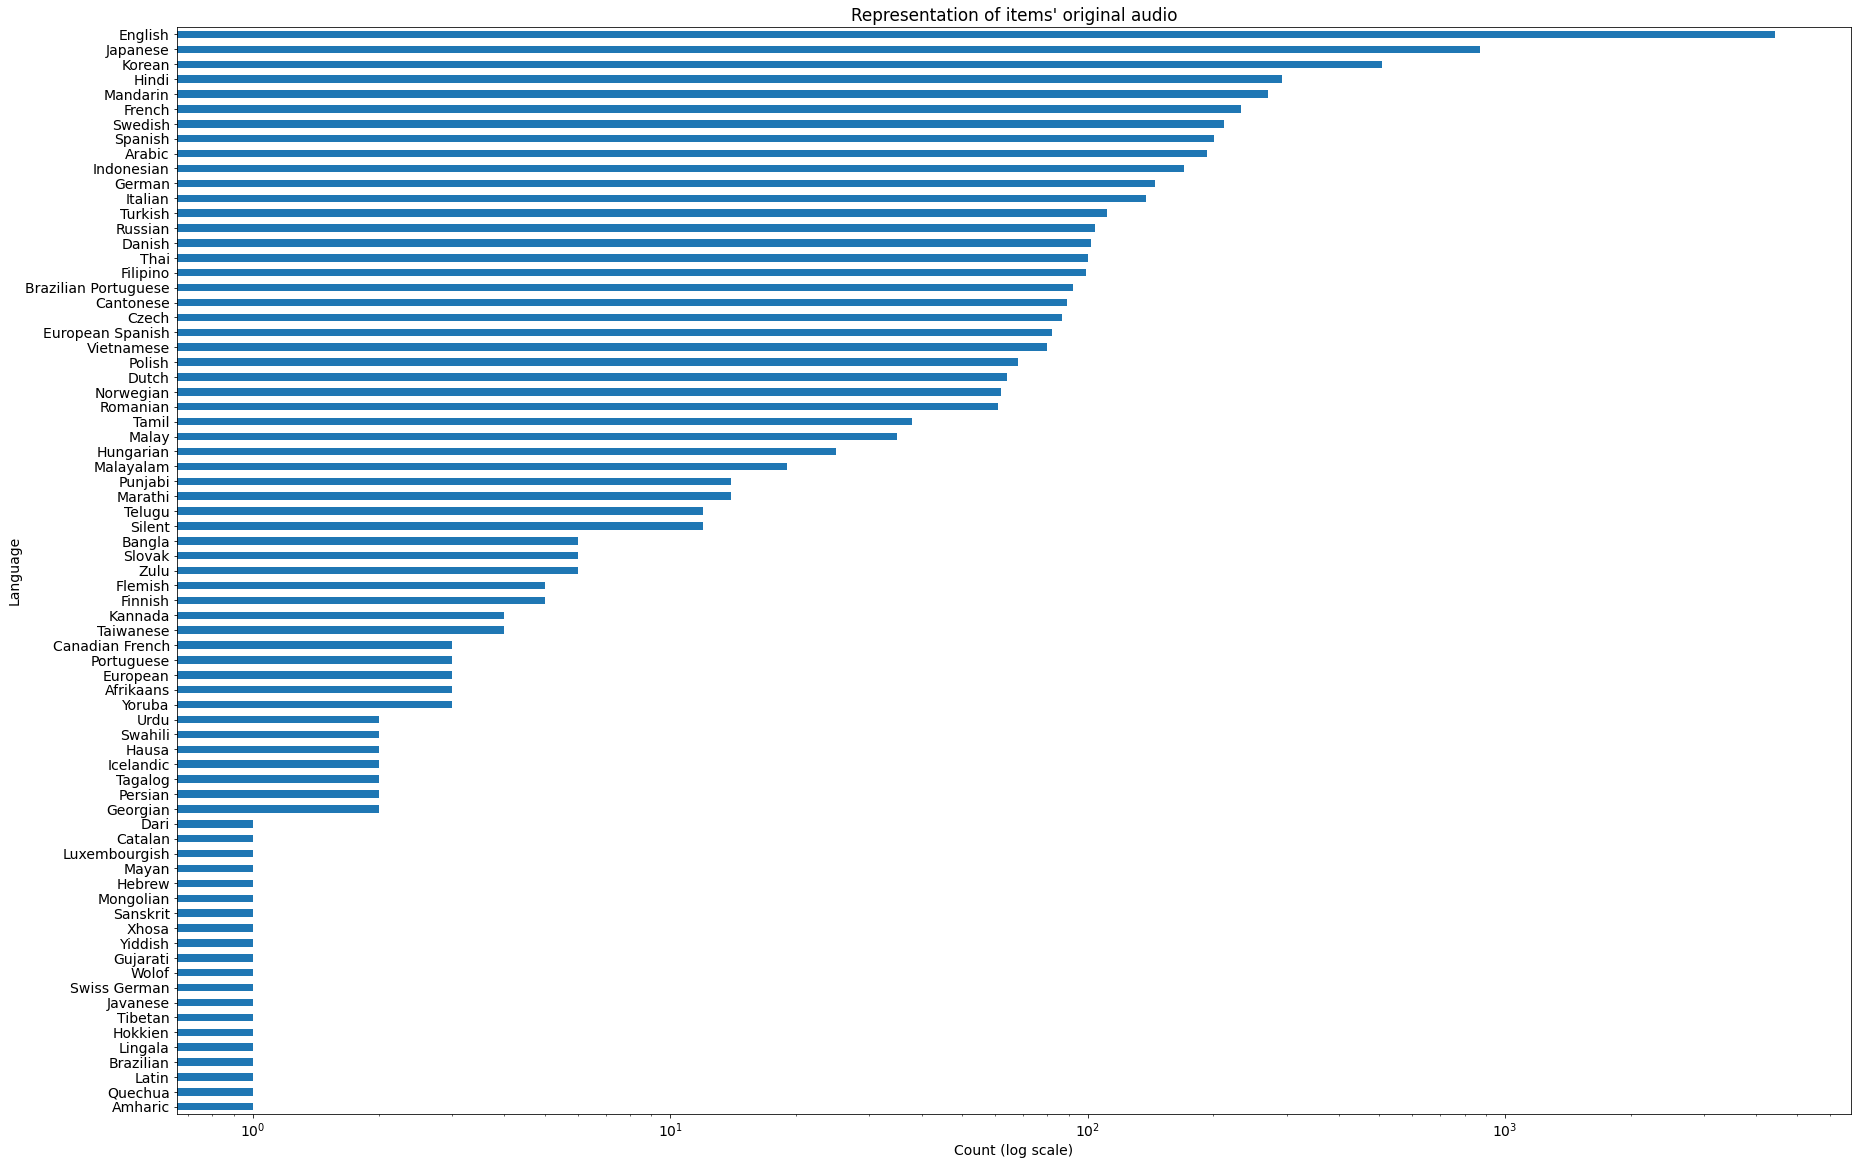

In [10]:
bar_values = movies.audio.value_counts(sort = True, ascending = True)
bar_values.plot.barh(figsize=(30,20))
plt.xscale('log')

plt.title('Representation of items\' original audio')
plt.ylabel('Language')
plt.xlabel('Count (log scale)')

print('There are {} different languages in our dataset. The 3 most present ones are English, Japanese and Korean.'.format(bar_values.count()))

### Releases per month

To stay competitive during their expansion, Netflix releases content frequently. Let's explore the amount of content their releases each month since April of 2015.

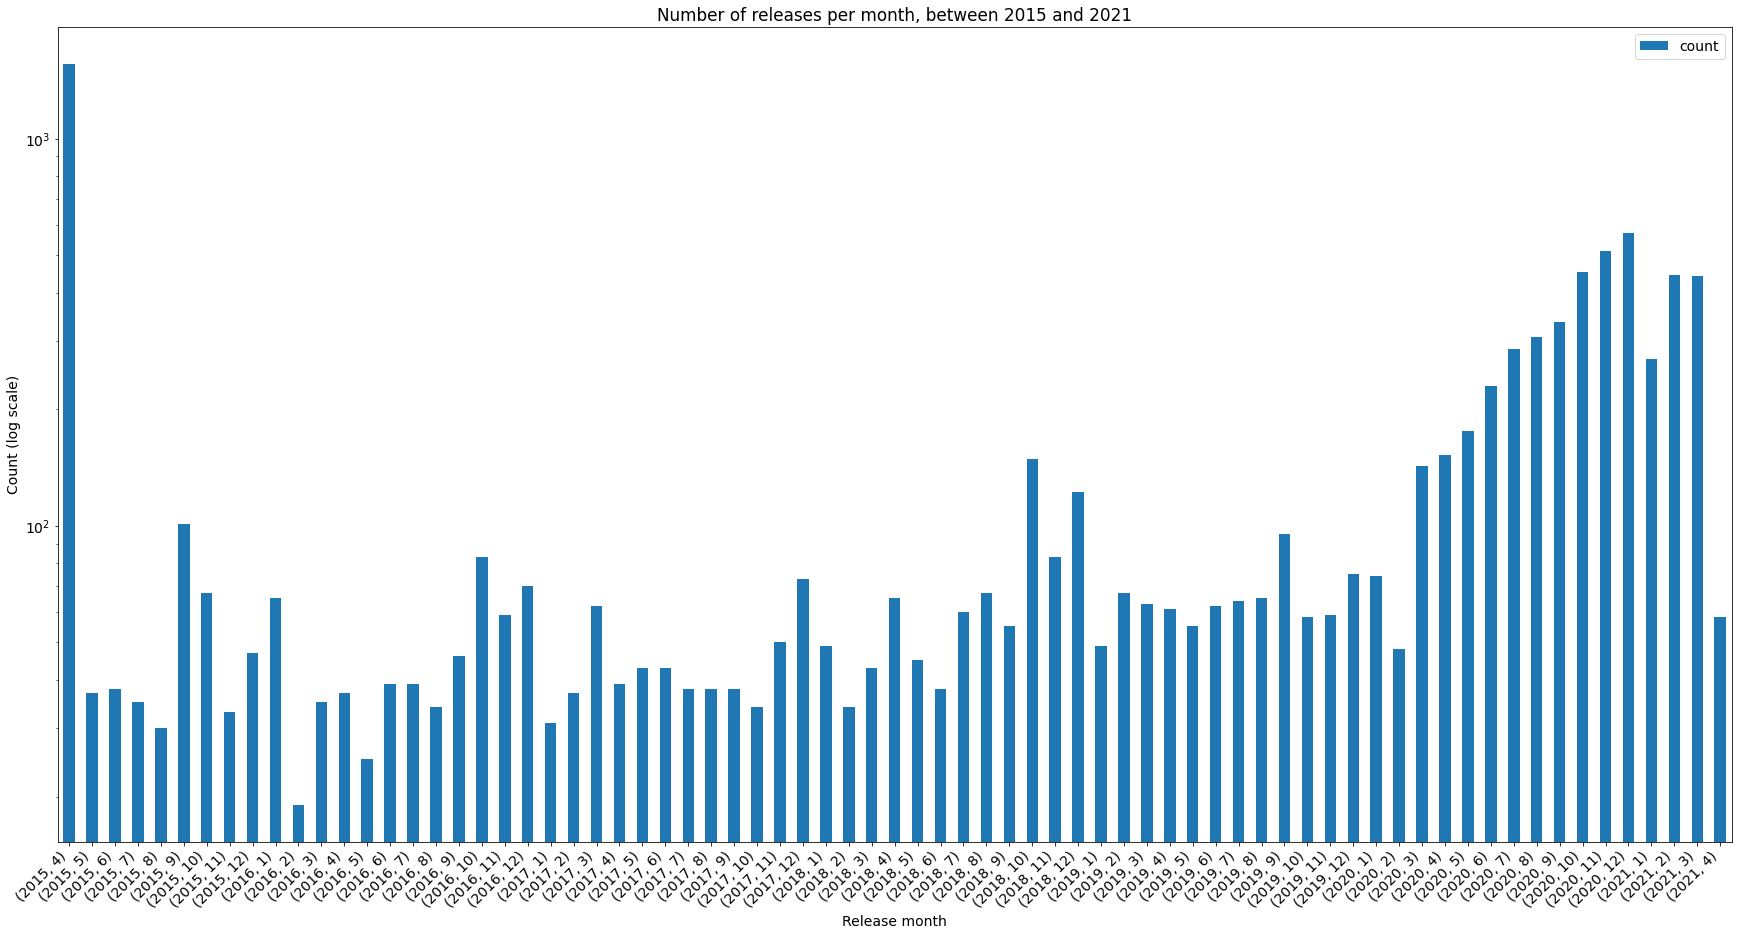

In [11]:
release_date = movies[['month', 'year']]
release_date['count'] = 1
release_date = release_date.groupby(['year', 'month']).count()

release_date.plot.bar(y = 'count', figsize=(30,15))
plt.yscale('log')

plt.xticks(rotation = 45, ha = 'right')
plt.title('Number of releases per month, between 2015 and 2021')
plt.xlabel('Release month')
plt.ylabel('Count (log scale)')
plt.show()

### Releases per month, per rating

We have just seen the amount of content they propose on their platform for each month since April 2015. For those same periods of time, let's study what type of user the content is intended for, characterized by the age rating.

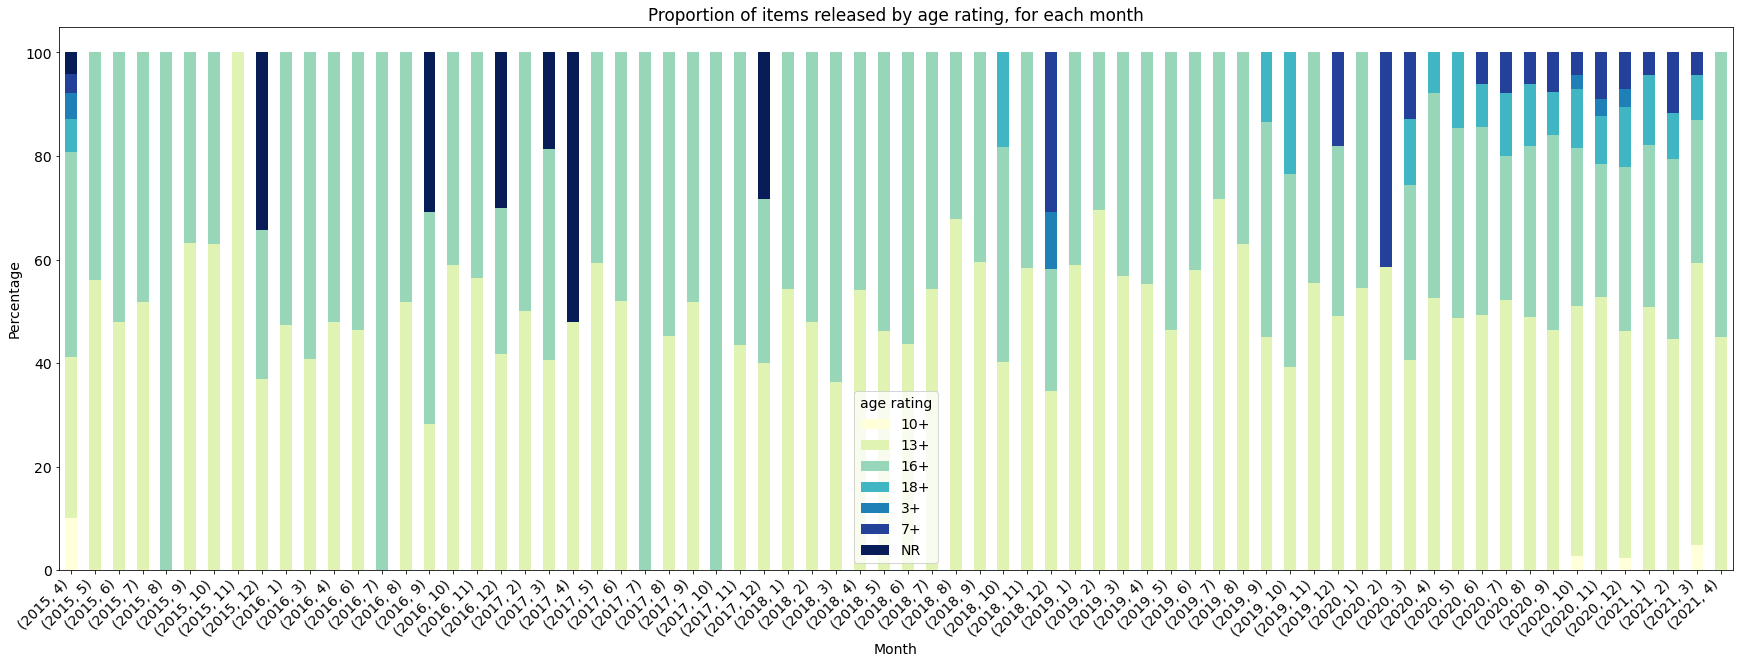

In [12]:
releases_per_month = movies[['age rating', 'month', 'year']]
releases_per_month['count'] = 1
releases_per_month = releases_per_month.groupby(['year', 'month', 'age rating']).count()
releases_per_month = releases_per_month[releases_per_month['count'] > 10].groupby(level = [0, 1])\
                                                                         .apply(lambda x: 100 * x / float(x.sum()))

releases_per_month.unstack().plot(kind='bar', y = 'count', stacked = True, 
                                  figsize = (30, 10), cmap = 'YlGnBu')
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Proportion of items released by age rating, for each month')
plt.show()

We can observe that Netflix started introducing a lot of content rated as `+18` as well as `+7` at the beginning of the year 2020. Generally, their content is mostly orientated to `+13` and `+16` viewers.

### Number of items per genre

As well as proposing frequent releases for different type of viewers, their content is adapted to different tastes. Let's study the volume of content proposed for each genre.

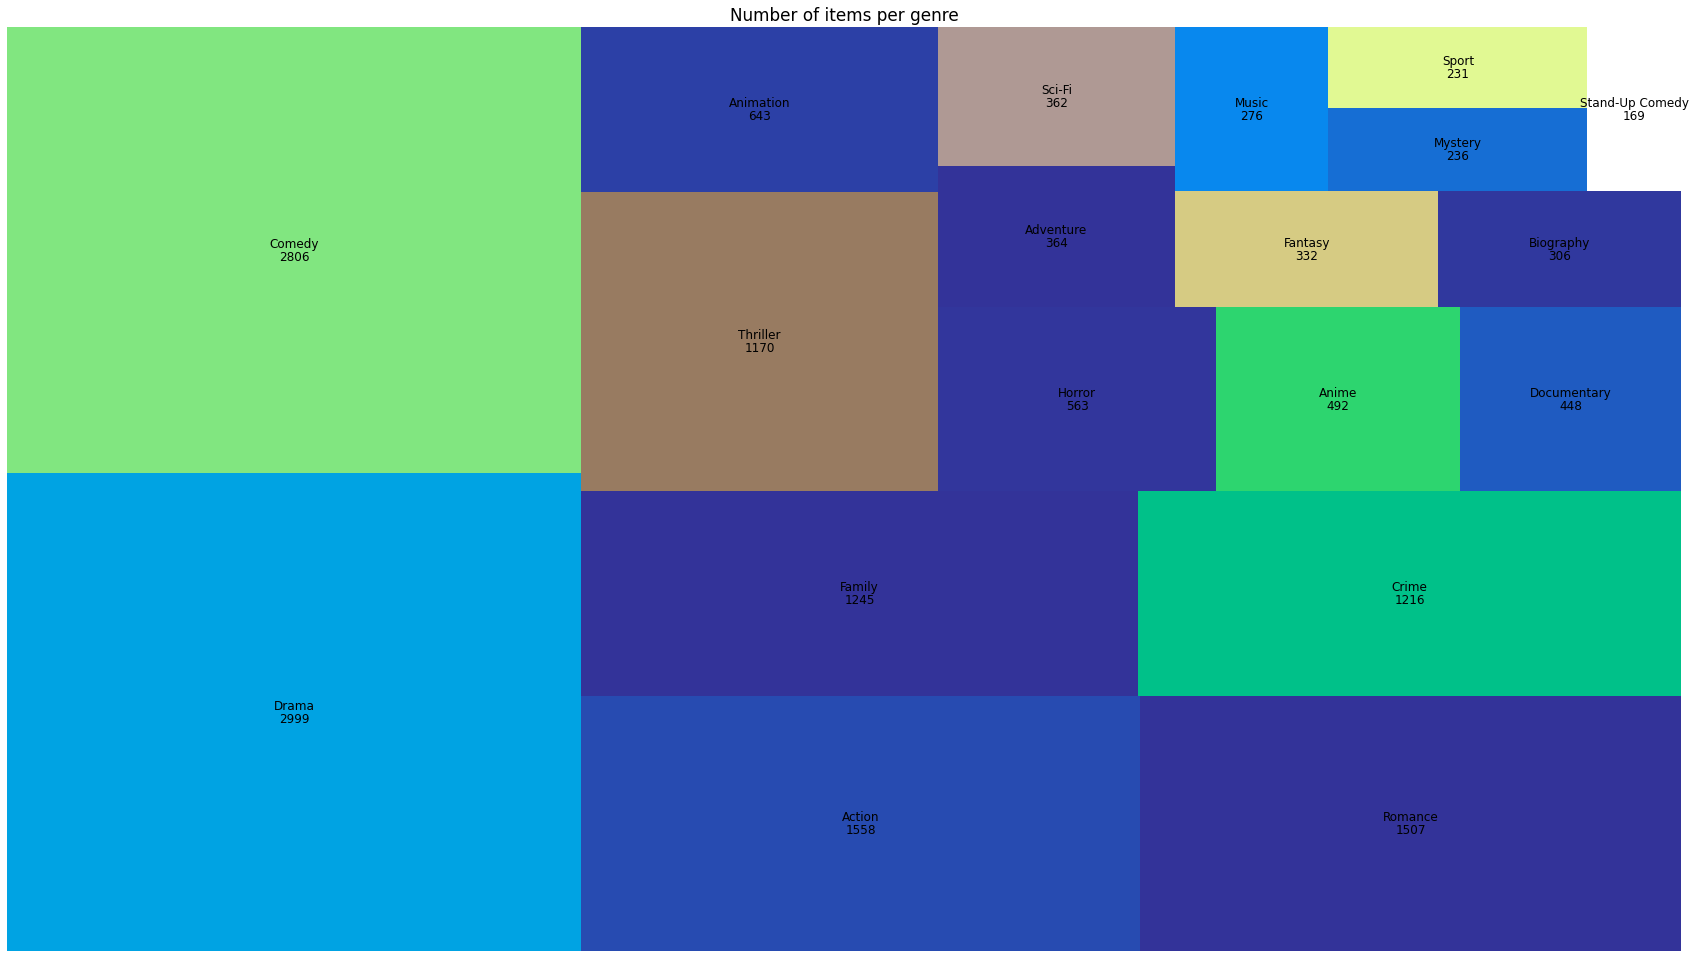

In [13]:
genre_counts = movies.genres.explode().value_counts()
genre_counts.index = genre_counts.index.map(get_genre_name)
genre_counts = genre_counts[genre_counts>150]
 
# Create a color palette, mapped to these values
my_values=[i**3 for i in range(len(genre_counts))]
cmap = matplotlib.cm.terrain
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
random.shuffle(colors)

plt.figure(figsize = (30,17))
squarify.plot(sizes = genre_counts, value = genre_counts.values, label = genre_counts.index, color = colors,text_kwargs={'color':'black', 'fontsize':12})
plt.title('Number of items per genre')
plt.axis('off')
plt.show()

Clearly the 2 most represented genres in the streaming platform's library are Drama and Comedy.

### Number of items per genre, per release date

After seeing what are the most popular genres in the entire Netflix catalogue, let's observe how Netflix varies his content over the years.

In [14]:
top_genres = movies.genres.explode().value_counts(sort = True, ascending = False)[:10]
top_genres.index = top_genres.index.map(get_genre_name) 

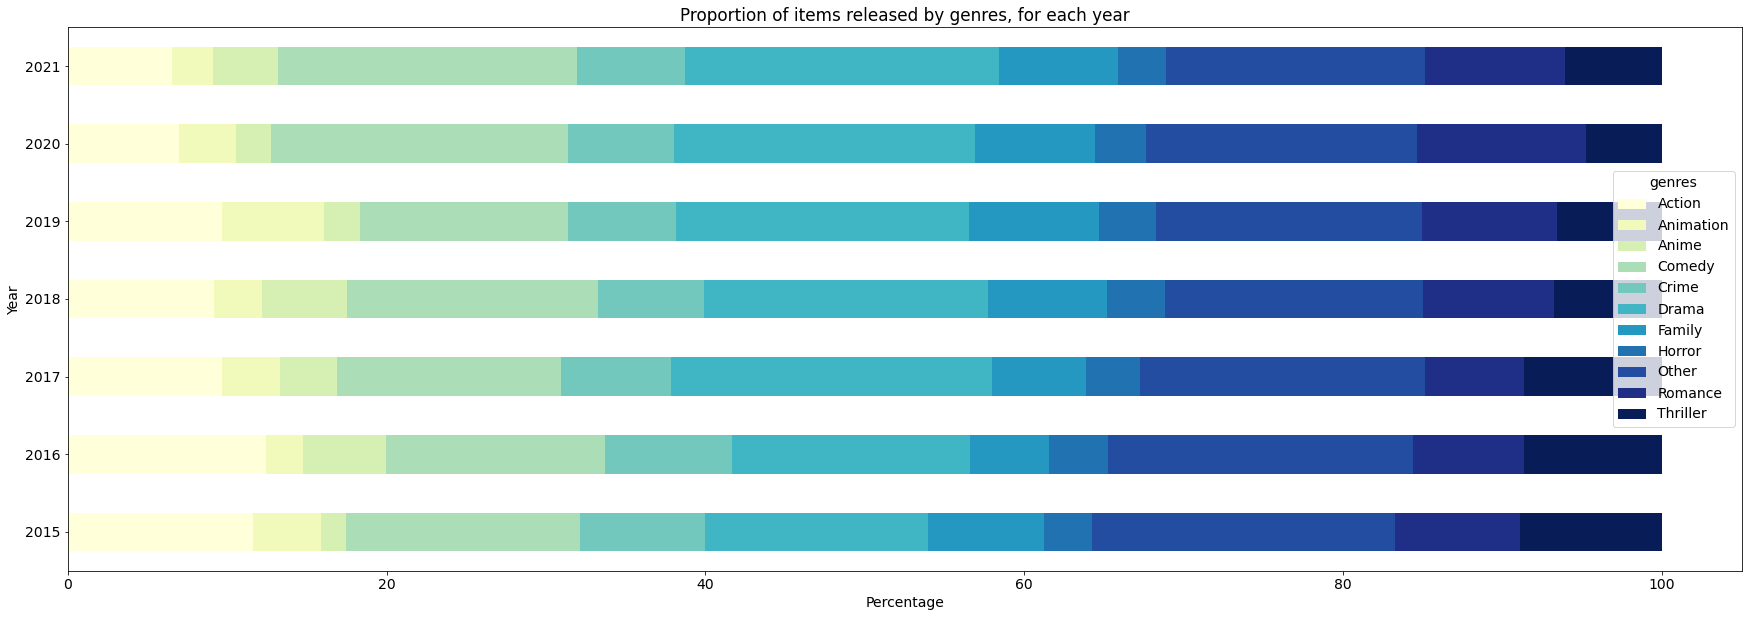

In [15]:
genres_release_year = movies.explode('genres')[['genres', 'year']]
genres_release_year.genres = genres_release_year.genres.map(get_genre_name)
genres_release_year['genres'] = genres_release_year.genres.map(lambda x: x if x in top_genres else 'Other') 
genres_release_year['count'] = 1
genres_release_year = genres_release_year.groupby(['year', 'genres'])\
                                         .count()
genres_release_year = genres_release_year.groupby(level=[0]).apply(lambda x: 100*x/float(x.sum()))

genres_release_year.unstack().plot(kind='barh', y = 'count', stacked = True, figsize = (30, 10), cmap = 'YlGnBu')
plt.ylabel('Year')
plt.xlabel('Percentage')
plt.title('Proportion of items released by genres, for each year')
plt.show()


### Top directors and top actors bar plots

The streaming platform offers a lot of content from a lot of cultures. Let's see who are the top-20 directors and the top-20 actors, according to the number of content they directed or acted in, respectively, in our dataset.

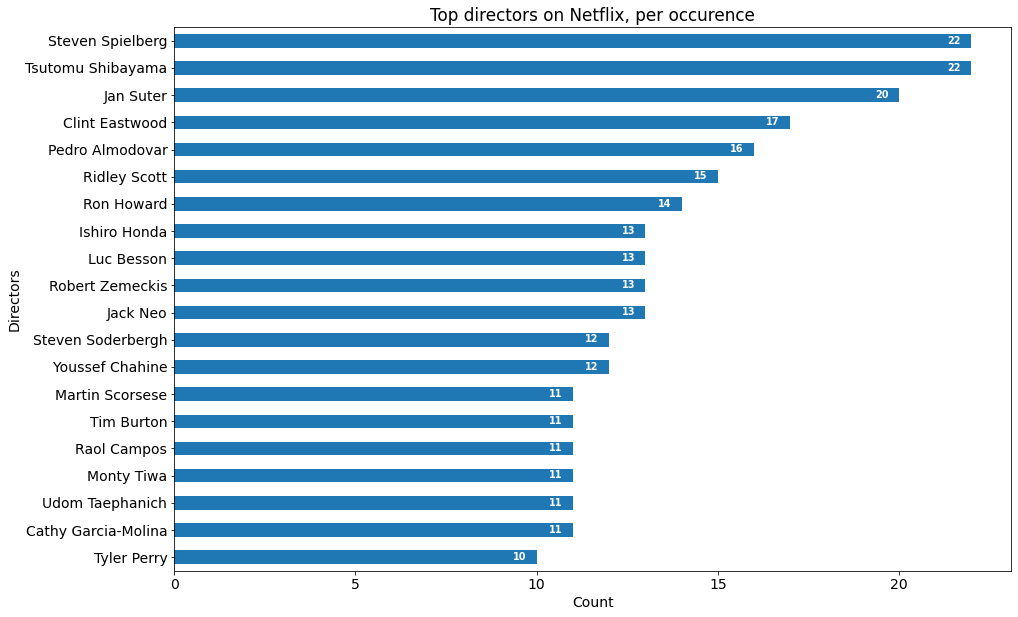

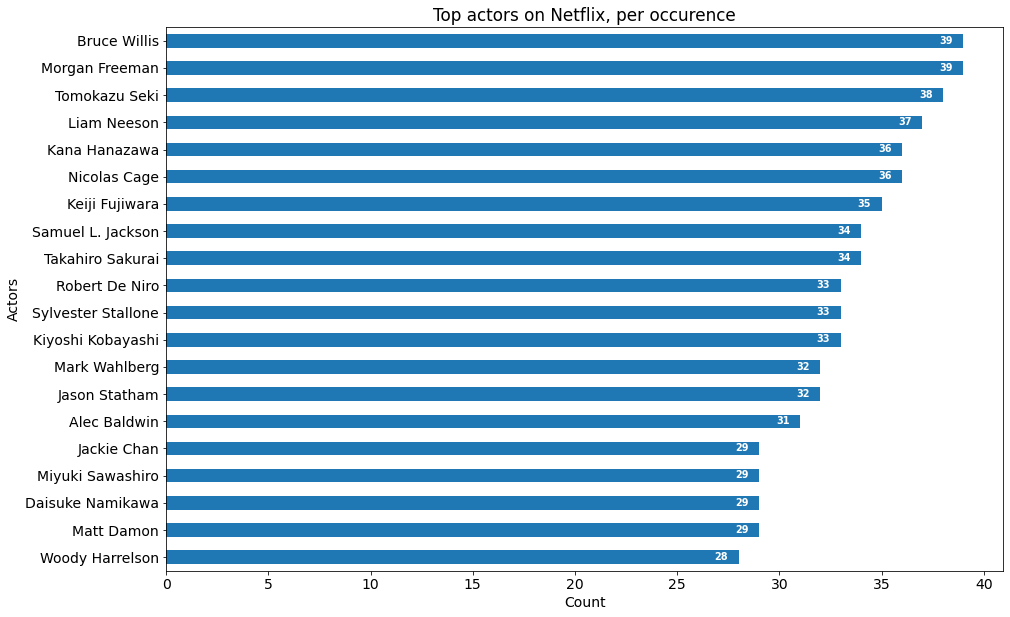

In [16]:
for role in ['directors', 'actors']:
    people = movies[role].dropna().explode(role).astype(int)
    people_count = people.value_counts(sort = True, ascending = True)
    people_count.index = people_count.index.map(get_person_name)
    nb_people = people.nunique()
    top_people = people_count[-20:]
    
    fig, ax = plt.subplots(figsize=(15,10))
    top_people.plot.barh(y = top_people, ax=ax)

    for i, v in enumerate(top_people):
        ax.text((v/top_people.values.max() - 0.03)*top_people.values.max(), 
                i-0.10, str(v), 
                color = 'white', fontweight = 'bold', fontsize = 'x-small')
        
    plt.title('Top {} on Netflix, per occurence'.format(role))
    plt.ylabel(role.title())
    plt.xlabel('Count')
    plt.show()

We can observe that for the tops are both quite culturally diverse, even though a lot of the directors and of the actors seems to belong to either an American or an Asian background.

### Most represented actors in top-graded items

Not all content available on Netflix is well rated on online movies and tv shows rating data bases such as IMDb. Let's see if the top-20 actors in the top-1000 rated items in IMDB are the same from the previous plot which was based on occurences.

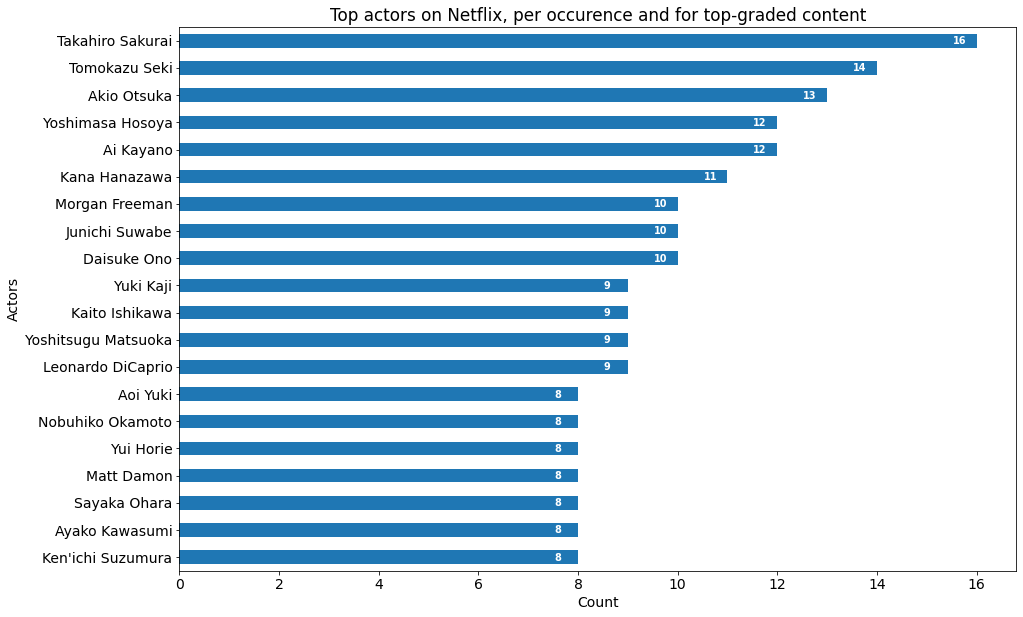

In [17]:
top_rated_items = movies.sort_values('imdb', ascending = False)[:1000]['actors'].dropna()
top_rated_items = top_rated_items.explode("actors").astype(int)

top_actors = top_rated_items.value_counts(sort = True, ascending = True)[-20:]
top_actors.index = top_actors.index.map(get_person_name)

fig, ax = plt.subplots(figsize=(15,10))
top_actors.plot.barh(ax=ax)

for i, v in enumerate(top_actors.values):
    ax.text((v/top_actors.values.max() - 0.03)*top_actors.values.max() , i-0.125, str(v), 
                color = 'white', fontweight = 'bold', fontsize = 'x-small')

ax.set_title('Top actors on Netflix, per occurence and for top-graded content')
ax.set_ylabel('Actors')
ax.set_xlabel('Count')
plt.show()

Clearly, we can note that the names and the order in the top-20 actors occurrences differs from the previous part. There are more Asian actors in this ranking than in the previous one.

### Most represented genres in top-graded items

We know that the most represented genres in the Netflix's catalogue are Drama and Comedy. Let's see if it is still the case in the top-1000 rated movies according to IMDb.

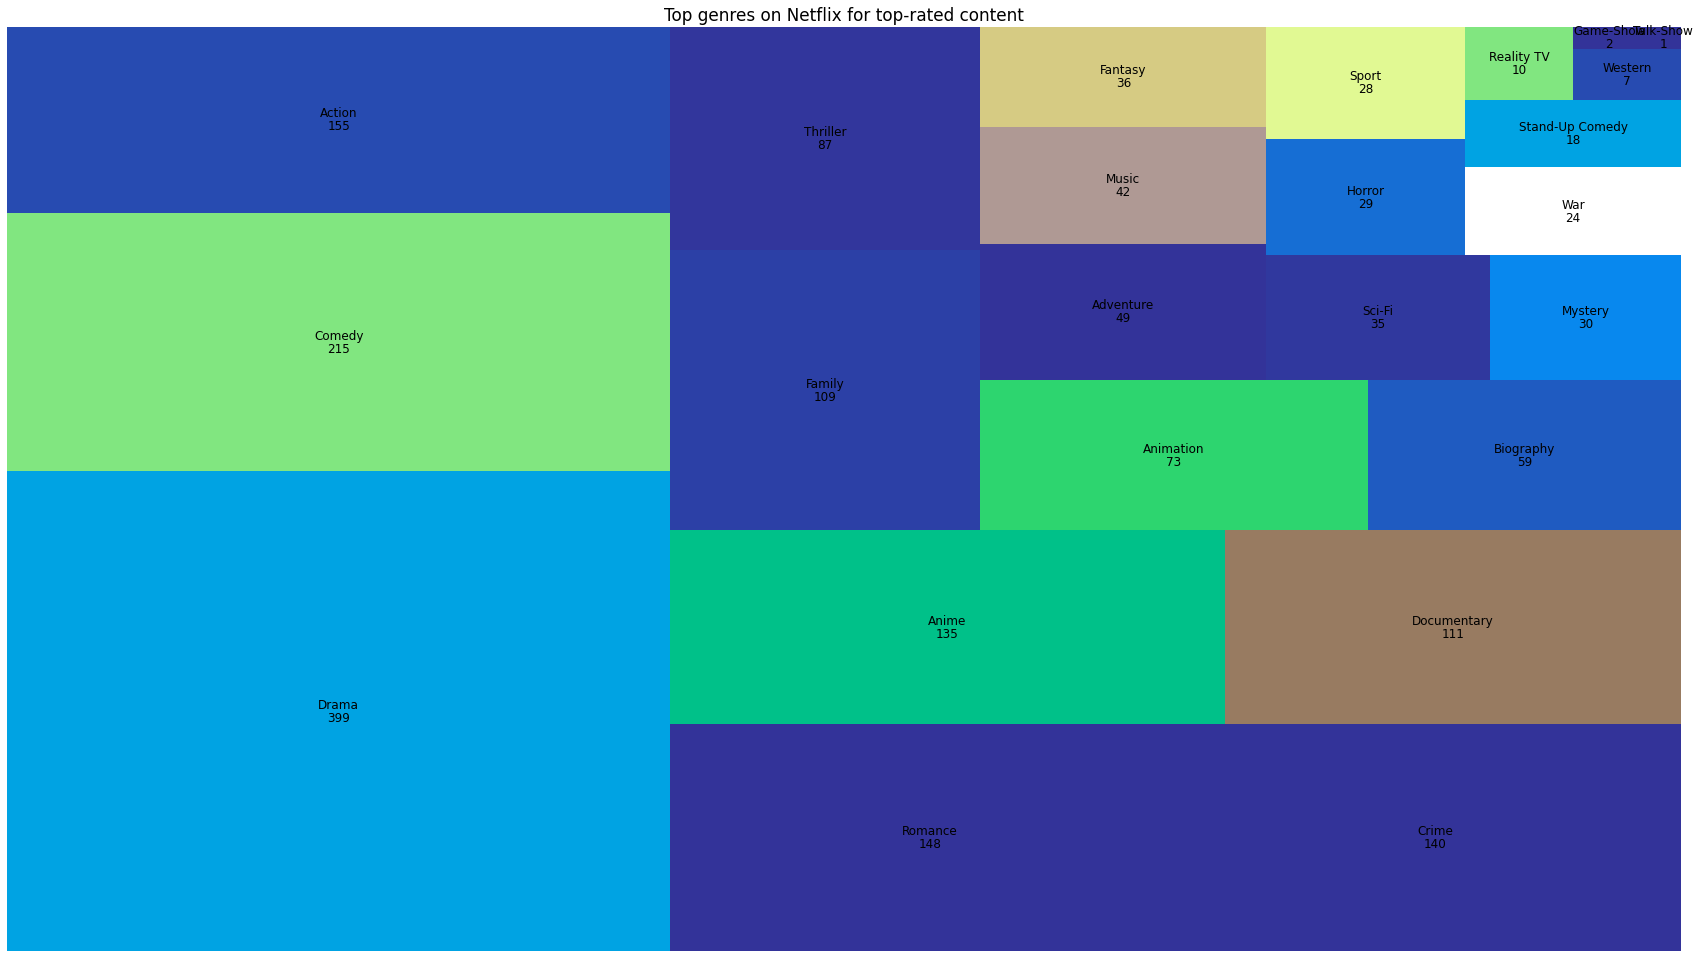

In [18]:
top_rated_items = movies.sort_values('imdb', ascending = False)[:1000]['genres'].dropna()
top_rated_items = top_rated_items.explode("genres").astype(int)

top_genres = top_rated_items.value_counts(sort = True, ascending = False)
top_genres.index = top_genres.index.map(get_genre_name)

plt.figure(figsize = (30,17))
squarify.plot(sizes = top_genres, value = top_genres.values, label = top_genres.index, color = colors,text_kwargs={'color':'black', 'fontsize':12})
plt.title('Top genres on Netflix for top-rated content')
plt.axis('off')
plt.show()

`Drama` and `Comedy` are still the most represented genres, even though the Drama one really dominates all the other genres.

### Cummulative distribution of genres over the years

Netflix's library has grown over the years. Let's see how the diversity of its catalogue has evolved since April 2015. At each point in time the plot represents the share of each genre in the Netflix catalogue. Some titles from the catalogue have multiple genres, therefore we do a weighted sum, so that the weight of all the genres for each title sums up to 1.

In [19]:
movies_release_genre = movies[['title', 'genres', 'release date on Netflix']].dropna()
movies_release_genre['release date on Netflix'] = movies_release_genre['release date on Netflix']\
    .apply(lambda dt: dt.replace(day=1))
movies_release_genre.set_index('release date on Netflix')

num_movies = len(movies_release_genre)

start_date = movies_release_genre['release date on Netflix'].min() - pd.DateOffset(years=1)
end_date = movies_release_genre['release date on Netflix'].max()

x_points = []

def get_genre_statistics_pre_date(date):
    movies_pre_date = movies_release_genre[
        movies_release_genre['release date on Netflix'] == date
    ]
    serieses = []
    for _, row in movies_pre_date.iterrows():
        genres_splitted = list(map(int, row['genres']))
        current_series = pd.Series(1/len(genres_splitted)
                                   , genres_splitted)
        serieses.append(current_series)
    if serieses == []:
        return {}
    movies_pre_date = pd.concat(serieses).reset_index()
#     print(movies_pre_date)
    movies_pre_date.columns = ['genre', 'weight']
    sum_per_genre = (movies_pre_date.groupby(by='genre').sum())\
        .reset_index()\
        .astype({'genre': 'int32'})
    sum_per_genre.genre = sum_per_genre.genre.map(get_genre_name) 
    return {
        row['genre']: row['weight'] / num_movies\
        for _, row in sum_per_genre.iterrows()
    }


genre_stats_per_date = []
current_date = start_date
while current_date <= end_date:
    current_date_stats = get_genre_statistics_pre_date(current_date)
    if genre_stats_per_date == []:
        genre_stats_per_date.append(current_date_stats)
    else:
        last_stats = genre_stats_per_date[-1]
        genre_stats_per_date.append({
            key: last_stats.get(key, 0) + current_date_stats.get(key, 0)
            for key in set(list(last_stats.keys()) + list(current_date_stats.keys()))
        })
    x_points.append(current_date)#.to_period('M'))
    current_date += pd.DateOffset(months=1)

In [20]:
all_genres = genre_stats_per_date[-1].keys()
for date_stats in genre_stats_per_date:
    for genre in all_genres:
        if genre not in date_stats:
            date_stats[genre] = 0
# genre_stats_per_date

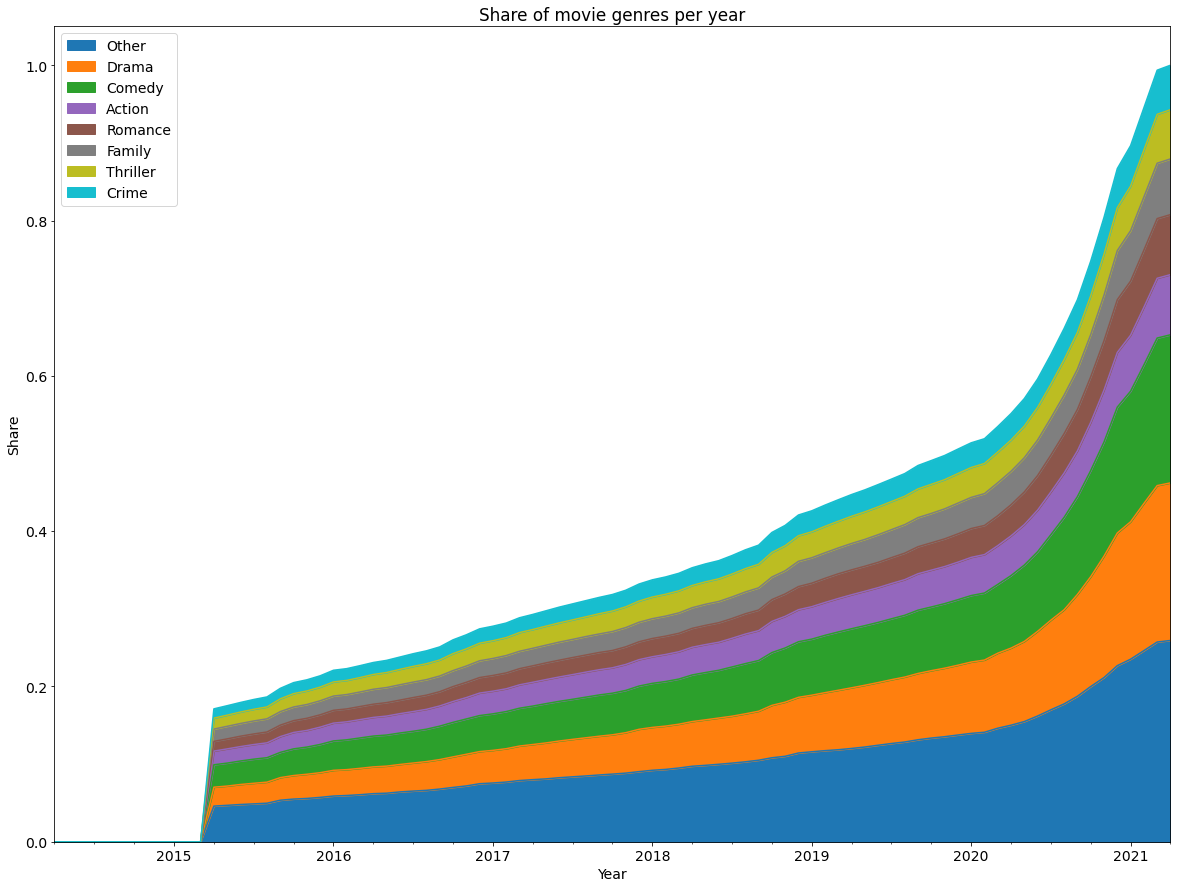

In [21]:
stats_per_genre = {
    genre: np.array([
        date_stats[genre]\
        for date_stats in genre_stats_per_date
    ])\
    for genre in all_genres
}

OTHERS_THRESHOLD = 5e-2
other = sum([
    stats\
    for stats in stats_per_genre.values()\
    if stats[-1] < OTHERS_THRESHOLD
])

stats_per_genre = {
    key: stats_per_genre[key]\
    for key in stats_per_genre\
    if stats_per_genre[key][-1] >= OTHERS_THRESHOLD
}

stats_per_genre['Other'] = other

stats_per_genre = {
    genre: stats_per_genre[genre]\
    for genre in sorted(stats_per_genre, key=lambda x: -stats_per_genre[x][-1])
}


pd.DataFrame(stats_per_genre, index=x_points).plot.area(figsize=(20, 15), cmap='tab10')
plt.title('Share of movie genres per year')
plt.xlabel('Year')
plt.ylabel('Share')
plt.show()


As seen before, the most represented genres are `Drama` and `Comedy`. The genres that have a share lower than 5% are included in the category `Other`.